In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel
import ipywidgets as widgets
from sympy import *

# LECTURA
## Demanda y oferta agregada en presencia de políticas monetarias no convencionales - Mendoza (2015)

La crisis internacional del 2008 y 2009 generó un cambio en la política monetaria estadounidense. Ello se efectuó mediante la Reserva Federal (Fed), la cual es el principal instrumento de política monetaria del banco central de Estados Unidos. Mendoza (2021) en su artículo Demanda y oferta agregada en presencia de políticas monetarias no convencionales abordan la pregunta de investigación acerca de cómo los modelos y métodos convencionales pueden ser útiles para responder a preguntas macroeconómicas actuales.

A lo largo del artículo, el autor explica el desarrollo de las políticas monetarias de la Fed no convencionales puestas en marcha a partir de la crisis internacional. Así, se señala a los modelos Keynesianos de mercado de bienes y también incluye el mercado de bonos para explicar y comprender el despliegue de dichas políticas de la Fed. De este modo, el autor propone la modelación de dichas políticas adoptando una opción teórica más tradicional con el modelo de Keynes, de Hicks y de Tobin
El autor desarrolla una estructura que facilita la comprensión del artículo económico, de modo que presenta gráficos en los que compara los resultados para ambos sectores y modelos, y también desarrolla ecuaciones de funciones. Por un lado, el autor explica cómo se construye la demanda agregada de la economía, con el manejo de la Fed de un mercado de bono con una tasa de interés a corto plazo, que es añadida a los valores comprados de largo plazo. Luego, explica que esta demanda agregada conjugada con una curva de oferta agregada convencional da como resultado un modelo macroeconómico del que se pueden determinar los valores de tasa de interés de largo plazo, el equilibrio de la producción y el nivel de precios.

Por otro lado, a partir de lo desarrollado en la primera parte, se puede explicar los distintos efectos sobre las variables endógenas tanto del modelo de política monetaria convencional, con el movimiento de la de interés de corto plazo, como en las políticas no convencionales, como compras de bono de largo plazo.

De esta manera, el autor revaloriza los modelos IS, LM y BB del modelo keynesiano, al explicar que de estos se desprende la demanda agregada y se le agrega una ecuación de la oferta agregada. Esto permite que se pueda construir un modelo que permita estudiar los efectos de las políticas macroeconómicas convencionales y no convencionales. Tal y como se señala en el artículo, la Fed pasó a ser un “creador de modelos de última instancia”, según el International Monetary Found (2013). Con ello, esta es una forma de demostrar que estos modelos pueden explicar mejor ciertas situaciones de crisis que otros métodos más modernos.

Finalmente, es importante considerar que estas políticas monetarias convencionales nos orientan favorablemente en situaciones de crisis. Sin embargo, como lo sugieren Tenjo y Uribe (2009), sería pertinente que se pueda refinar el marco institucional nacional con políticas más afines y/o un plan, de acuerdo a cada contexto. Prevenir los riesgos y garantizar la estabilidad económica no solo se encuentra dentro de los márgenes de la política monetaria, sino que su efecto trasciende a otras áreas.

# CÓDIGO

## Modelo IS-LM

### Función que representa la curva IS

Primero, la ecuación de la curva IS

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- Donde $ B_0 = C_o + I_o + G_o + X_o $ y $ B_1 = 1 - (b - m)(1 - t) $

Segundo, la ecuación de la curva LM:

$$  r = -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y $$

Son dos ecuaciones sumultáneas. Todos los parámetros son posititvos. La propensión marginal a consumir está entre 0 y 1: $ 0<b<1 $

Podemos igualar, sustituir o reducir ambas ecuaciones para encontrar el nivel de Ingresos equilibrio $(Y^e)$ y la tasa de interés de equilibrio $(r^e)$:

$$ -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- Ingreso de equilibrio:

$$ Y^e = \frac{j B_o}{k h + j B_1} + (\frac{h}{k h + j B_1})\frac{Ms_o}{P_o} $$

- Tasa de interés de equilibrio:

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})\frac{Ms_o}{P_o} $$

Estas dos ecuaciones representan el modelo IS-LM

### Gráfico del equilibrio simultáneo en los mercados de bienes y de dinero.

In [12]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

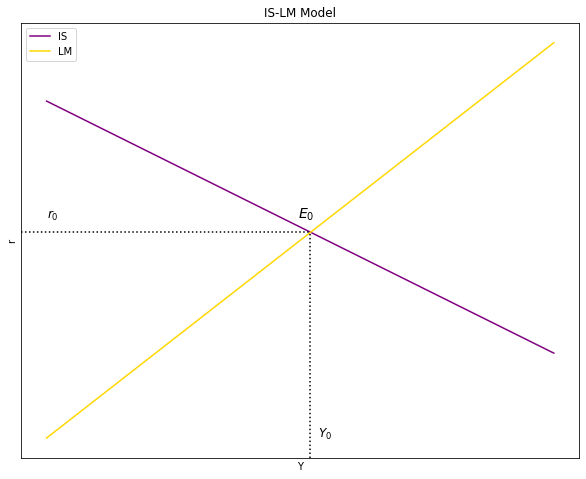

In [13]:
# Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
# Curva IS
ax.plot(Y, r_is, label = "IS", color = "purple") #IS
# Curva LM
ax.plot(Y, r_lm, label="LM", color = "gold")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
# Graficar la linea horizontal - r
plt.axvline(x=51.5,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")
# Grafica la linea vertical - Y
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

## Estática comparativa

Analice los efectos sobre las variables endógenas Y, r de una disminución del gasto fiscal. $ (ΔG_o<0) $. El análisis debe ser intuitivo, matemático y gráfico

Si $$ΔGo<0$$
- Mercado de Bienes
$$ Go ↓ → DA↓ → DA<Y → Y↓, entonces DA = Y $$ 
- Mercado de dinero
$$ Y↓ → Md↓ → Md<Ms → r↓, entonces Md = Ms $$ 

Análisis matemático:

$$ Y^e = \frac{j}{k h + j B_1}ΔGo<0 $$

- Tasa de interés de equilibrio:

$$ r^e = \frac{k}{kh + jB_1}ΔGo<0 $$


### Gráfico

In [17]:
# Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [18]:
# NUEVA curva IS: reducción Gasto Fiscal de Gobienro (Go)
    
# Definir parámetro cambiado
Go = 10

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

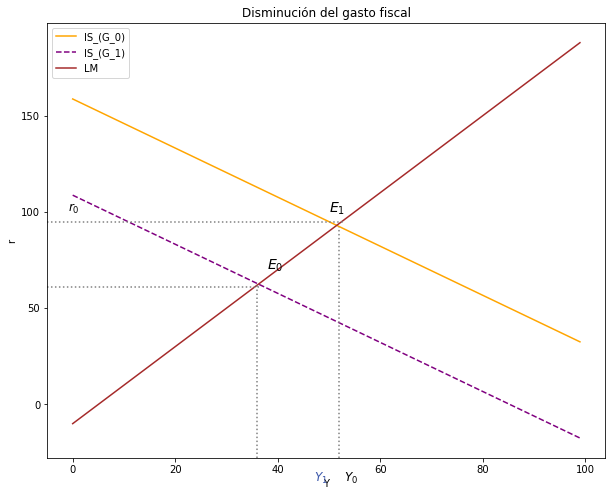

In [19]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "orange") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "purple", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "brown")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=36,  ymin= 0, ymax= 0.40, linestyle = ":", color = "grey")
plt.axhline(y=61, xmin= 0, xmax= 0.38, linestyle = ":", color = "grey")

plt.axvline(x=52,  ymin= 0, ymax= 0.53, linestyle = ":", color = "grey")
plt.axhline(y=95, xmin= 0, xmax= 0.53, linestyle = ":", color = "grey")
plt.text(50,100, '$E_1$', fontsize = 14, color = 'black')

plt.text(38,70, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Disminución del gasto fiscal", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()